# Essential Questions to Answer
1. What rental features (amenities, house rules) lead to higher customer ratings and fetch higher rental income?
2. What are the features of high-demand properties? (75th, 80th percentile -> )
3. Are higher-income properties close to big cities, beaches, or tourist attractions? 
4. Which countries have the top Airbnb ratings and reviews?


In [109]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [110]:
# restart notebook to use aribnb_clean_2.csv
df = pd.read_csv('airbnb_clean_2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df_wo_new = df.loc[df['rating'] != -1]

What are the features of high-demand properties?
* assumption: High in demand means there are many reviews and there were many people who stayed at the airbnb compared to others

In [111]:
# Define high-demand properties (any listings with reviews in the 80th percentile)
high_demand_threshold = df_wo_new['reviews'].quantile(0.75)
high_rating_threshold = df_wo_new['rating'].quantile(0.75)
high_demand_properties = df_wo_new[(df_wo_new['reviews'] >= high_demand_threshold) & (df_wo_new['rating'] >= high_rating_threshold)]
high_demand_properties

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
144,49527209,Livada-The tiny A-frame House/wi-fi/cadă baie/duș,4.99,97,380545308,"Peștenița, Hunedoara County, Romania",3062.00,Romania,0,2,3,1,1,0,3 00 pm - 12 00 am,12 00 pm,673.49,False,True,False,False,True,True,True,True,False,False,True,True,False,8,7,10
153,28573139,"❤THE NEST, 2BR Charming BeachFront home, HIN K...",4.98,91,89960116,"ตำบล เกาะพะงัน, ST, Thailand",11401.00,Thailand,1,3,5,0,2,0,3 00 pm - 9 00 pm,11 00 am,317.09,True,True,False,False,True,True,True,True,False,False,True,False,True,9,8,10
165,41611002,Villa overlooking the Balkan Mountains,5.00,120,191571720,"Troyan, Lovech, Bulgaria",7995.00,Bulgaria,1,3,6,0,2,0,After 3 00 pm,Flexible,4468.01,True,True,False,False,True,True,True,False,False,False,False,True,False,3,6,10
193,6512620,Villa Sunnyside Gartenhaus,4.99,124,25849825,"Dresden, Sachsen, Germany",5072.00,Germany,1,2,2,0,0,0,After 4 00 pm,11 00 am,5543.70,True,True,False,False,True,False,True,False,False,False,True,False,True,4,6,10
317,17010903,Beautiful cabin in Nusfjord,4.99,71,111886105,"Nusfjord, Nordland, Norway",12262.00,Norway,1,3,4,0,2,0,After 3 00 pm,12 00 pm,1140.82,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,5980767,Lovely mountain house - great view!,4.98,93,7368567,"Aich, Steiermark, Austria",16646.00,Austria,1,3,4,0,2,0,Flexible,12 00 pm,18194.08,True,True,False,False,True,True,True,True,False,False,False,True,True,9,8,11
12285,23464352,Romantic Rustic in the heart of the Dolomites,5.00,134,175091745,"Padola, Veneto, Italy",9513.00,Italy,1,2,3,0,1,0,4 00 pm - 9 00 pm,10 00 am,10397.71,True,True,False,False,True,False,True,True,False,False,True,True,True,8,6,10
12299,37008506,The Llama Lodge - a Log Cabin on a Llama Farm,4.99,91,195980040,"Llandissilio, United Kingdom",12890.00,United Kingdom,1,2,4,0,1,0,After 4 00 pm,12 00 pm,16737.48,False,True,False,True,True,True,True,False,False,False,True,True,True,5,7,10
12553,44532378,"Private glemping, forest lake, cozy, bbq",5.00,79,5673696,"Amata parish, Latvia",9603.00,Latvia,0,1,2,1,1,0,After 3 00 pm,12 00 pm,18843.80,False,False,False,False,True,True,True,False,False,False,True,True,True,7,6,10


In [112]:
features = ['tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
            'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 
            'no_parties_or_events']

high_demand_features = high_demand_properties[features].mean()
overall_features = df_wo_new[features].mean()
high_demand_features

tv                     0.57
wifi                   0.76
chromecast             0.03
refrigerator           0.23
kitchen                0.90
view                   0.52
parking                0.92
workspace              0.29
pool                   0.10
gym                    0.00
no_pets                0.68
no_smoking             0.87
no_parties_or_events   0.84
dtype: float64

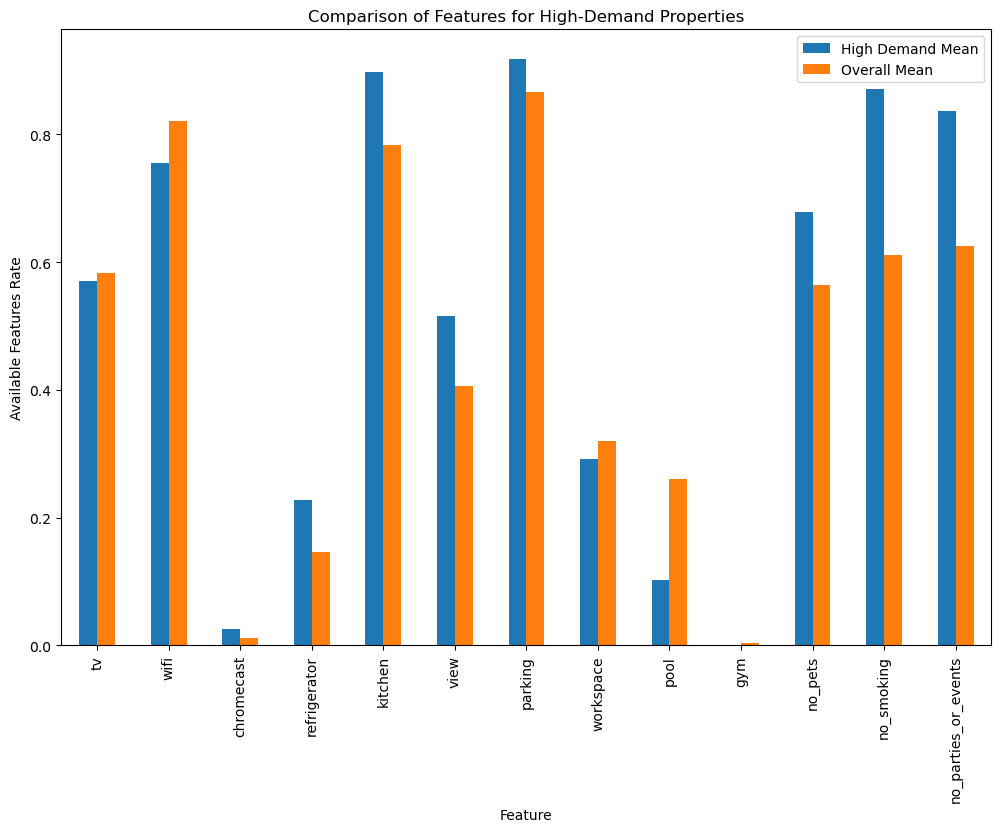

In [113]:
comparison_df = pd.DataFrame({
    'Feature': features,
    'High Demand Mean': high_demand_features,
    'Overall Mean': overall_features
})

comparison_df.plot(x='Feature', kind='bar', figsize=(12, 8))
plt.title('Comparison of Features for High-Demand Properties')
plt.ylabel('Available Features Rate')
plt.show()

Comparison of High Demand mean vs overall mean:
* Higher the number = higher the liklihood listings had features
* Most of the features are very similar from high demand vs overall mean
* Standout features:
  * chromecast is a rare find, but the airbnb high in demand had 2 times more liklihood of having chromecast than overall listings
  * fridge was found more in the more high in demand airbnb by nearly 25% than the overall
  * no pets, no smoking, and no parties or events were more desirable than the overall airbnb listing
  * wifi is expected and does not affect the rating of the aribnb
  * most airbnb have parking, kitchen, and wifi (which is not too surprising since the that is the expectation)
* This comparison really sugges that airbnb is more for convenience stay (like finding a second home when on vacation)




Which countries have the top Airbnb ratings and reviews?

In [114]:
#create stellar column for main airbnb dataframe also
df_wo_new['stellar'] = (df_wo_new['reviews'] >= high_demand_threshold) & (df_wo_new['rating'] >= high_rating_threshold)

# groupby country and stellar
airbnb_by_country_stellar = df_wo_new.groupby(['country', 'stellar'])

# find the top 10 countries with the most number of stellar listings
top_10_countries_raw_num = airbnb_by_country_stellar['country'].count().unstack().sort_values(by = True, ascending = False).head(10)
top_10_countries_raw_num = top_10_countries_raw_num.reindex([True,False], axis = 1)
top_10_countries_raw_num

/var/folders/vh/dl6t7pz56gz05sm_y2j5fq840000gn/T/ipykernel_98723/3651488450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_new['stellar'] = (df_wo_new['reviews'] >= high_demand_threshold) & (df_wo_new['rating'] >= high_rating_threshold)


stellar,True,False
country,,
United Kingdom,60.00,236.00
United States,18.00,158.00
Greece,18.00,730.00
France,16.00,397.00
Italy,15.00,713.00
Poland,8.00,90.00
Norway,8.00,176.00
Japan,7.00,302.00
Iceland,7.00,23.00


In [115]:
top_10_countries_stellar_percentage = airbnb_by_country_stellar['country'].count().unstack().apply(lambda x : x/x.sum() * 100, axis =1).sort_values(by = True, ascending = False)
top_10_countries_stellar_percentage = top_10_countries_stellar_percentage.reindex([True,False], axis = 1)
top_10_countries_stellar_percentage.head(10)

stellar,True,False
country,,
Ireland,33.33,66.67
Belize,28.57,71.43
Costa Rica,25.00,75.00
Peru,25.00,75.00
Iceland,23.33,76.67
United Kingdom,20.27,79.73
India,20.00,80.00
Latvia,10.53,89.47
United States,10.23,89.77


In [116]:
# Extract the top 10 countries with the most number of stellar listings
top_10_countries_raw_num_names = set(top_10_countries_raw_num.index.get_level_values('country'))
print(top_10_countries_raw_num_names)
# Extract the top 10 countries with the highest percentage of stellar listings
top_ten_countries_stellar_percentage_names = set(top_10_countries_stellar_percentage.head(10).index.get_level_values('country'))
print(top_ten_countries_stellar_percentage_names)

{' United Kingdom', ' Iceland', ' Poland', ' Japan', ' Italy', ' France', ' United States', ' Greece', ' Romania', ' Norway'}
{' Ireland', ' Peru', ' United Kingdom', ' Iceland', ' Latvia', 'India', ' Belize', ' United States', ' Canada', ' Costa Rica'}


In [117]:
country_summary = df_wo_new.groupby('country').agg({'rating': 'mean', 'reviews': 'sum'}).reset_index()


In [118]:
# Filter the rows where the country is in the target set
top_10_most_stellar_listings = country_summary[country_summary['country'].isin(top_10_countries_raw_num_names)]
top_10_most_stellar_listings = top_10_most_stellar_listings.sort_values(by=['rating', 'reviews'], ascending=[False, False])

top_10_most_stellar_listings.head()

,country,rating,reviews
103,United Kingdom,4.94,30451
104,United States,4.92,23251
80,Romania,4.91,3955
77,Poland,4.89,3338
38,Iceland,4.89,7776


In [119]:
def plot_bar(df, x, y, label_var, text_pad, title, x_label, y_label, x_lim_flag):
    # Plot for Average Rating by Country with Number of Reviews Annotation
    plt.figure(figsize=(14, 7))
    bars = plt.barh(df[x], df[y], color='cornflowerblue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest rating at the top
    if x_lim_flag:
        plt.xlim(4, 5.05)

    # Annotating each bar with the number of reviews
    for bar, r in zip(bars, df[label_var]):
        plt.text(
            bar.get_width() + text_pad,  # Adjust position relative to bar width
            bar.get_y() + bar.get_height() / 2, 
            f'{r:.2f}', 
            va='center', 
            ha='left'
        )

    plt.tight_layout()
    plt.show()

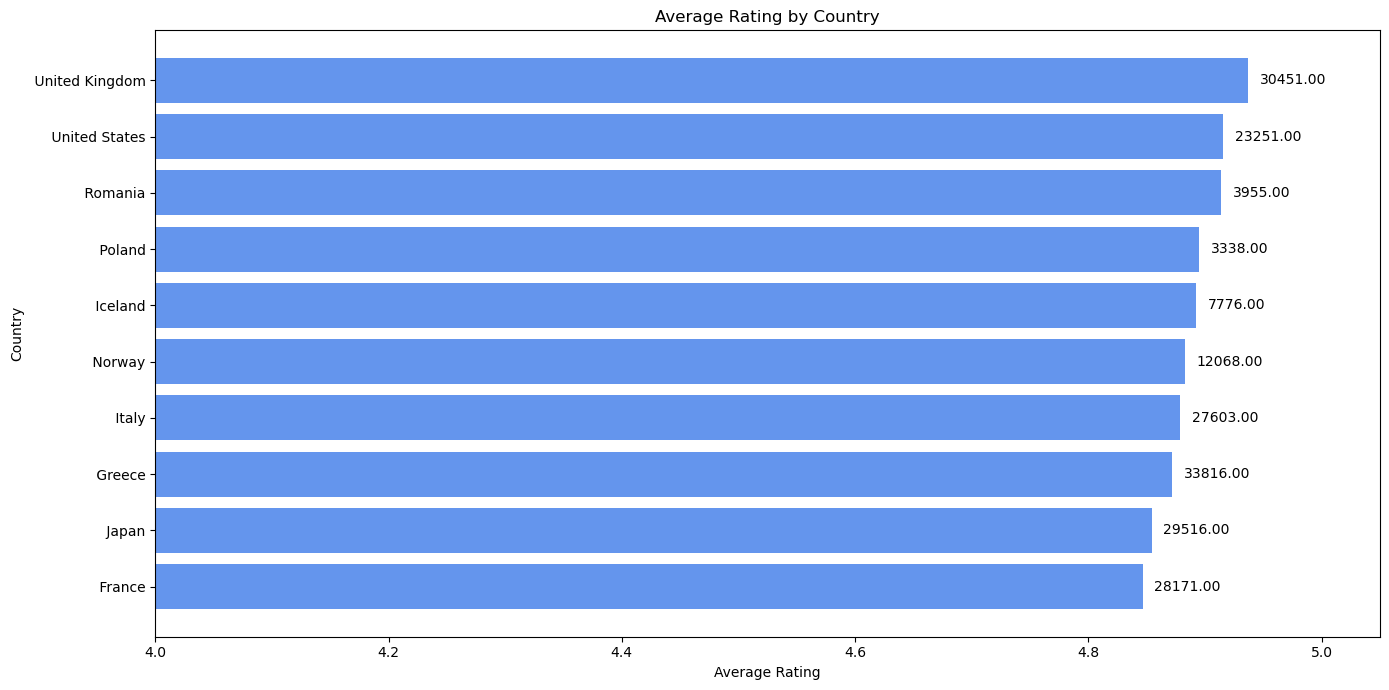

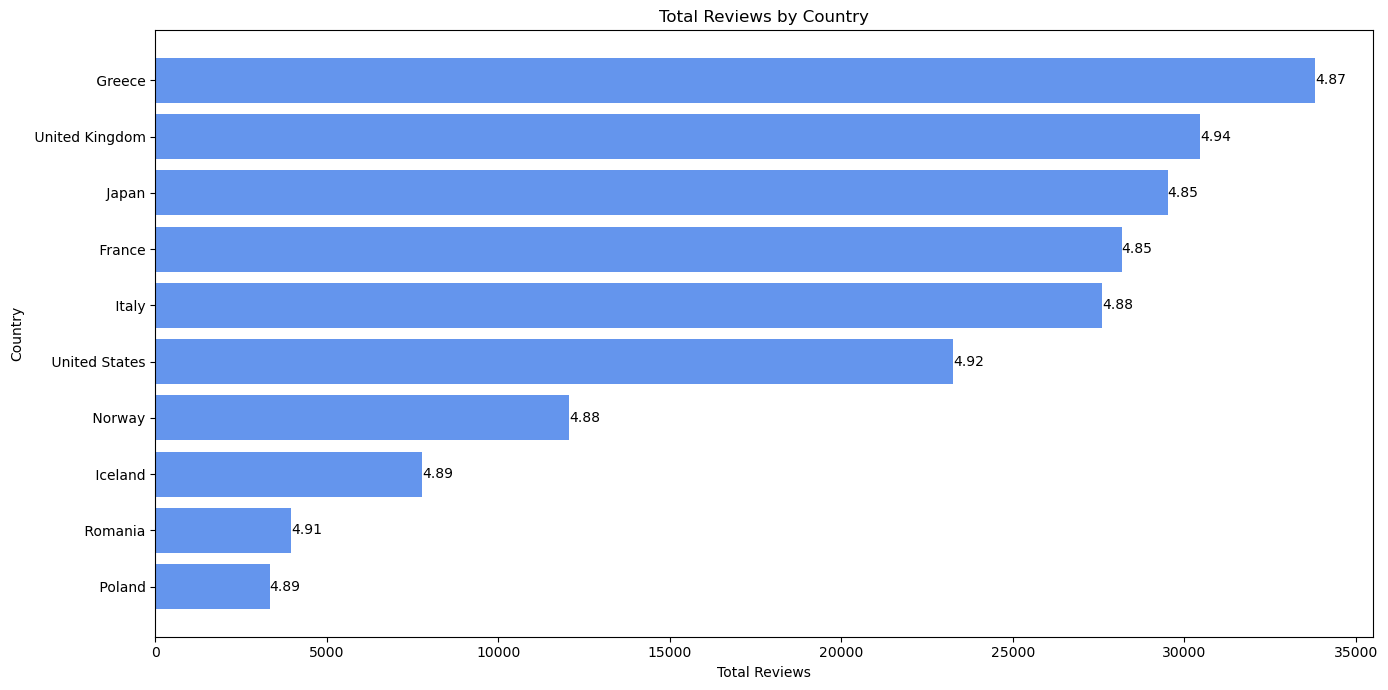

In [120]:
plot_bar(top_10_most_stellar_listings, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_10_most_stellar_listings.sort_values(by='reviews', ascending=False), 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


In [121]:
top_10_high_stellar_density = country_summary[country_summary['country'].isin(top_ten_countries_stellar_percentage_names)]
top_10_high_stellar_density = top_10_high_stellar_density.sort_values(by=['rating', 'reviews'], ascending=[False, False])

top_10_high_stellar_density.head()

,country,rating,reviews
41,Ireland,4.95,1084
103,United Kingdom,4.94,30451
14,Canada,4.93,2127
104,United States,4.92,23251
7,Belize,4.89,475


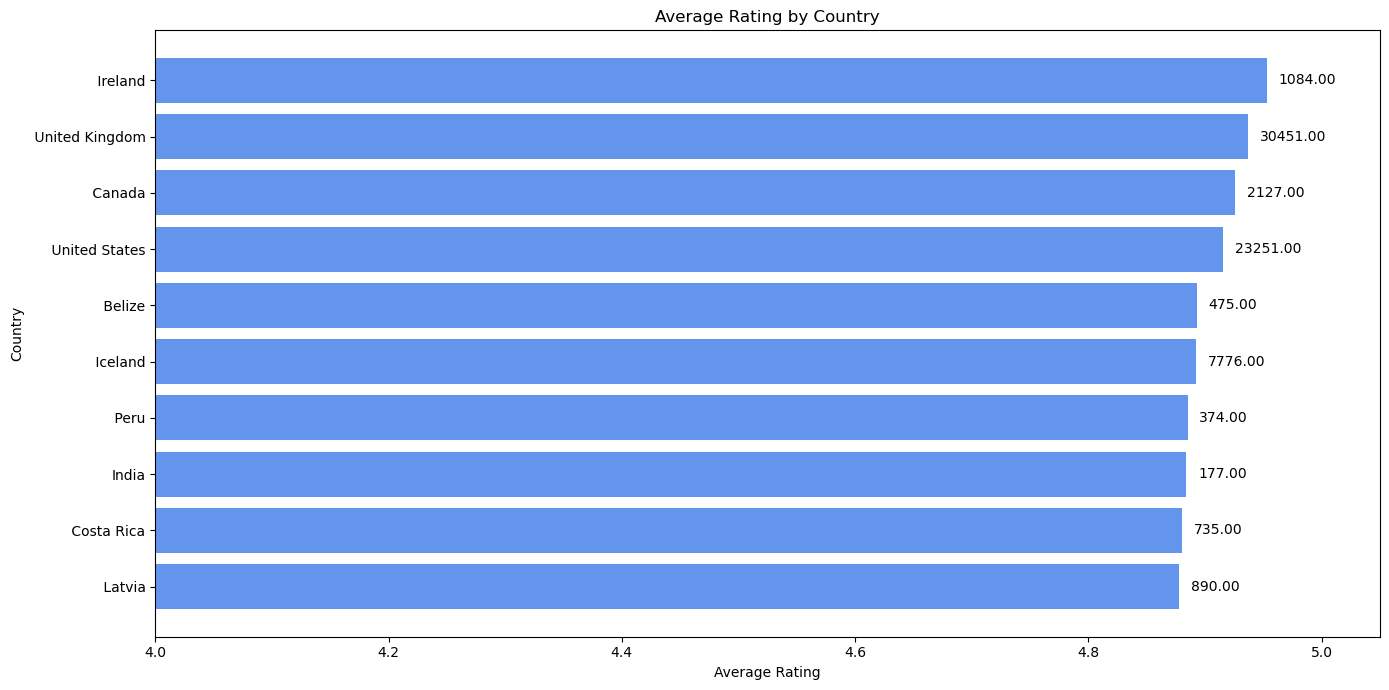

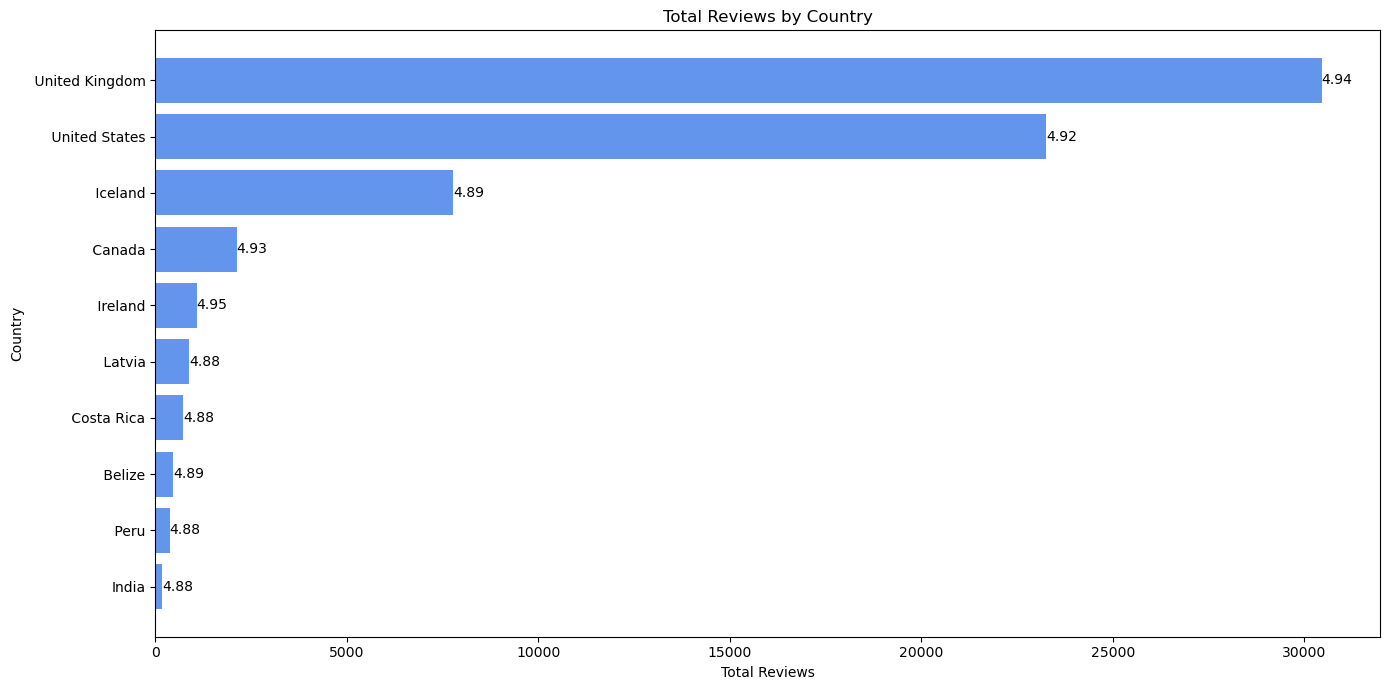

In [122]:
plot_bar(top_10_high_stellar_density, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_10_high_stellar_density.sort_values(by='reviews', ascending=False), 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


In [123]:
countries_best = top_10_countries_raw_num_names.intersection(top_ten_countries_stellar_percentage_names)
high_demand_countries = country_summary[country_summary['country'].isin(countries_best)]



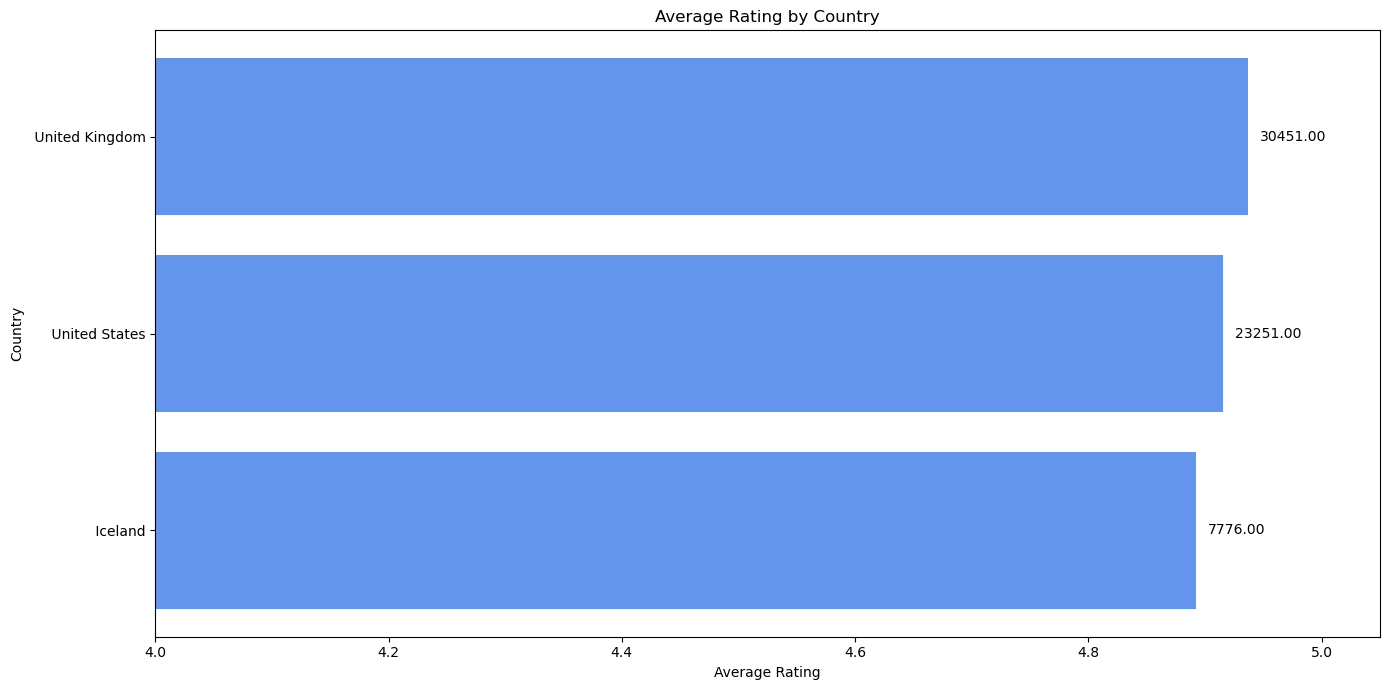

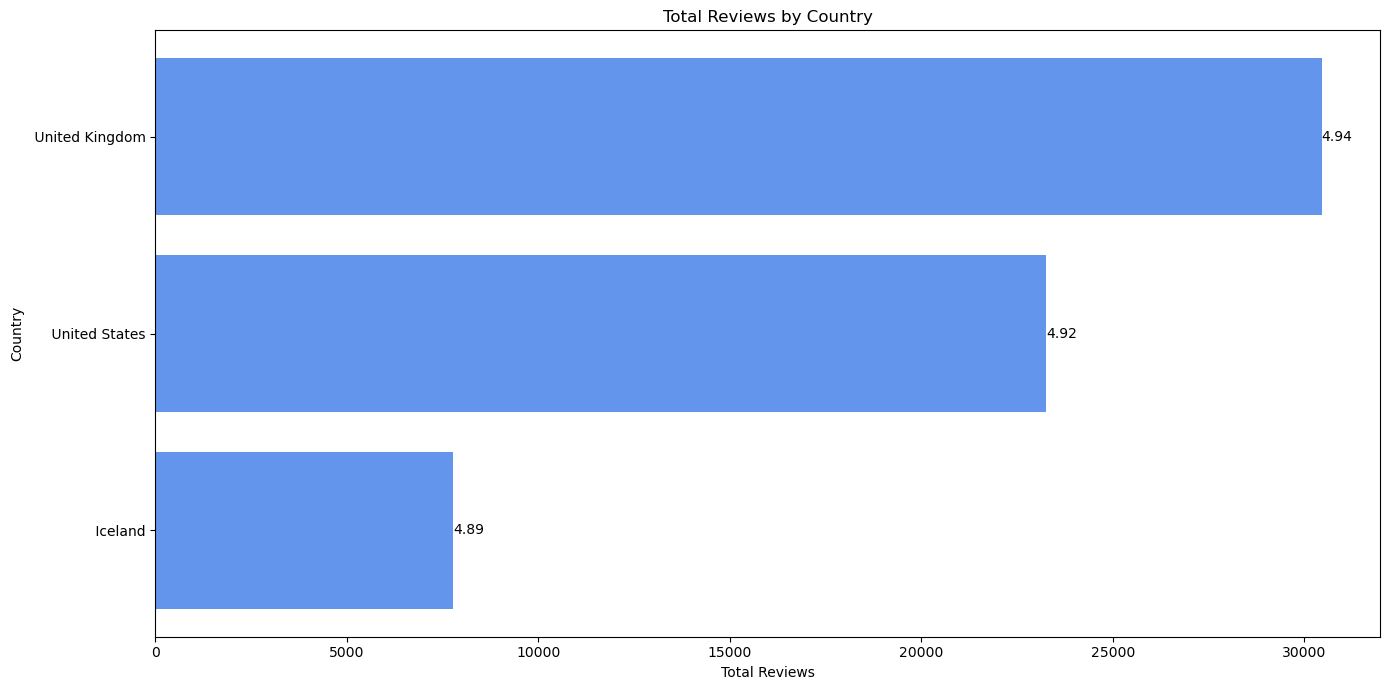

In [124]:
# Data preparation
top_ratings = high_demand_and_rating.sort_values(by='rating', ascending=False).head(20)
top_reviews = high_demand_and_rating.sort_values(by='reviews', ascending=False).head(20)

plot_bar(top_ratings, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_reviews, 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


The highest rated countries do not as many ratings as other, which explains why they have 5 out of 5 ratings. This shows people's tendancy to give out 5 stars on aribnb, and only if there is something significantly bad about the data, they will give them a bad rating.

India has the most amount of reviews with an average rating of 4.92. This is probably due to India being the most populated country in the world.


# STOP: Don't use after this
____

Where is the cheapest airbnb?

In [125]:
# Group by country and find the minimum price for each country
country_mean_prices = df.groupby('country')['usd_price'].mean()
# Sort the mean prices in ascending order
country_mean_prices = country_mean_prices.sort_values()
country_mean_prices
# df[df['country']==' Lebanon']

country
 Lebanon           0.15
 Madagascar        0.22
 Uzbekistan        0.28
 Vietnam           0.45
 Indonesia         1.14
                 ...   
Belize         55301.50
 Belize        55787.58
 Malta         56086.45
 Kuwait       111928.10
 Bahamas      116397.50
Name: usd_price, Length: 146, dtype: float64

In [126]:
# Find the country with the cheapest minimum price
cheapest_country = country_min_prices.idxmin()
cheapest_price = country_min_prices.min()

print(f"The country with the cheapest Airbnb is {cheapest_country} with a price of {cheapest_price}.")

The country with the cheapest Airbnb is  Lebanon with a price of 0.11936219739292363.


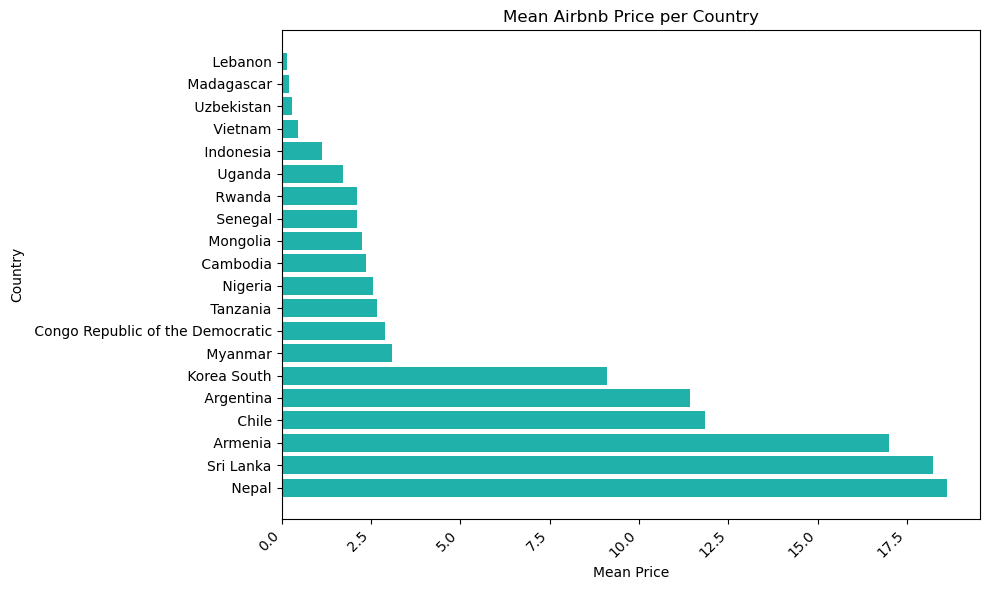

In [127]:
plt.figure(figsize=(10, 6))
top_20_prices = country_mean_prices.head(20)
bars = plt.barh(top_20_prices.index, top_20_prices.values, color='lightseagreen')
plt.ylabel('Country')
plt.xlabel('Mean Price')
plt.title('Mean Airbnb Price per Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()  # Invert the y-axis to have the most reviews at the top


plt.tight_layout()
plt.show()

Doesn't seem very promising that the prices are correct...